In [ ]:
from keras.datasets.mnist import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
load_data()

In [3]:
# ((訓練組圖片, 訓練組答案), (測試組圖片, 測試組答案))
((x_train, y_train),(x_test,y_test)) = load_data()

In [7]:
print("訓練資料維度", x_train.shape) # (60000, 28, 28) : 28 x 28 pixels, 60000張
print("測試資料維度", x_test.shape) # (10000, 28, 28) : 28 x 28 pixels, 10000張

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


ANS: 6


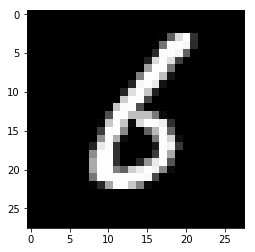

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, x_train.shape[0])
print("ANS:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [18]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,94,220,254,48,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,253,253,246,43,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,245,97,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,221,64,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,119,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# 整理一下
# 先將input x的像素值常態化，好配合keras一開始隨機的那組weights
# 進mlp前，一定要把照片矩陣攤開
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# y 進去的時候要 one-hot encoding: ex. 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
from keras.models import Sequential
from keras.layers import Dense # 連接層
mlp = Sequential()
# 第一個中間層，一定要告訴它多少個輸入(input_dim)
mlp.add(Dense(units=128, input_dim=784, activation="relu"))
mlp.add(Dense(units=10, activation="softmax"))
mlp.summary() 
# params = input x layers + layers(每個激活函數的偏移層 bias ，將每個output的基準點-偏移量，讓最後的激活函數的每個input基準點都是0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 訓練前：確定模型訓練方式
# optimizer 累積動能，讓結果有機會跳出局部最佳解，達到可能的全局最佳解 
# Loss: 回歸:mse, 二元分類(output = 1): binary_crossentropy, 多元分類(output > 1): categorical_crossentropy
mlp.compile(optimizer= "adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

In [38]:
# batch_size: 看幾張圖做一次梯度下降
# epochs: 整個資料集看幾次
# epoch = 10, batch_size=200, 60000 * 10 / 200 = 3000 ->總共做 3000次梯度下降
# verbose: 進度的詳細程度
# 做 cross_validation的樣本比例
mlp.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=15,
        validation_split =0.1, 
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 3s - loss: 0.4349 - acc: 0.8802 - val_loss: 0.1897 - val_acc: 0.9500
Epoch 2/15
 - 2s - loss: 0.1962 - acc: 0.9439 - val_loss: 0.1367 - val_acc: 0.9638
Epoch 3/15
 - 2s - loss: 0.1445 - acc: 0.9583 - val_loss: 0.1136 - val_acc: 0.9658
Epoch 4/15
 - 2s - loss: 0.1143 - acc: 0.9670 - val_loss: 0.0981 - val_acc: 0.9713
Epoch 5/15
 - 2s - loss: 0.0930 - acc: 0.9733 - val_loss: 0.0964 - val_acc: 0.9723
Epoch 6/15
 - 2s - loss: 0.0780 - acc: 0.9774 - val_loss: 0.0844 - val_acc: 0.9747
Epoch 7/15
 - 2s - loss: 0.0662 - acc: 0.9816 - val_loss: 0.0823 - val_acc: 0.9745
Epoch 8/15
 - 2s - loss: 0.0577 - acc: 0.9838 - val_loss: 0.0870 - val_acc: 0.9740
Epoch 9/15
 - 2s - loss: 0.0496 - acc: 0.9863 - val_loss: 0.0803 - val_acc: 0.9750
Epoch 10/15
 - 1s - loss: 0.0432 - acc: 0.9882 - val_loss: 0.0764 - val_acc: 0.9767
Epoch 11/15
 - 2s - loss: 0.0374 - acc: 0.9901 - val_loss: 0.0753 - val_acc: 0.9777
Epoch 12/15
 - 2s - loss: 0.0324 - a

In [39]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 52us/step


[0.07260574884396047, 0.9783]

In [41]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,966,0,1,1,0,2,2,0,5,3
1,0,1119,2,1,0,2,2,1,8,0
2,3,1,1010,1,2,1,2,4,8,0
3,0,0,6,980,0,9,0,3,8,4
4,2,0,2,1,958,0,2,2,2,13
5,3,0,0,3,1,874,3,0,5,3
6,5,3,1,1,4,2,940,0,2,0
7,1,3,10,3,0,0,0,999,5,7
8,1,1,2,3,3,4,2,3,952,3
9,1,4,0,2,6,6,0,3,2,985


你想要判斷的圖片名稱:test.png
預測結果: [3]


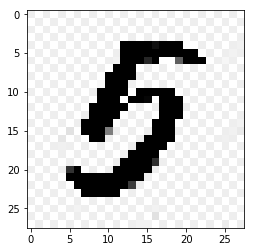

In [44]:
# Pillow
from PIL import Image
import numpy as np
fn = input("你想要判斷的圖片名稱:")
img1 = np.array(Image.open(fn).resize((28,28)).convert("L")) #
x_pre = np.array([img1]).reshape(1,784) / 255
x_pre.shape
print("預測結果:", mlp.predict_classes(x_pre))
plt.imshow(img1, cmap="gray")